Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Plot target with each feature separately
Cement (component 1)(kg in a m^3 mixture)


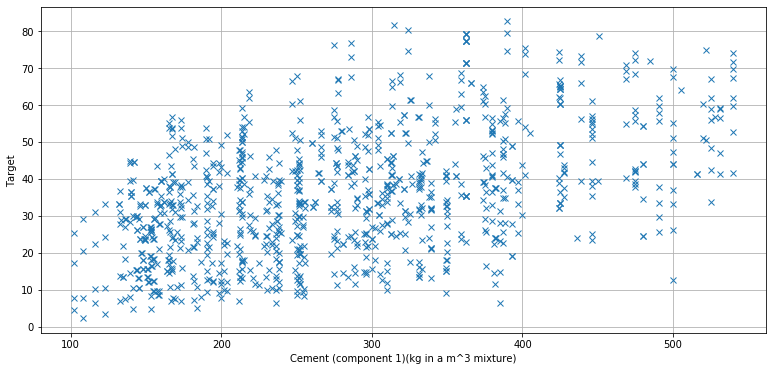

Blast Furnace Slag (component 2)(kg in a m^3 mixture)


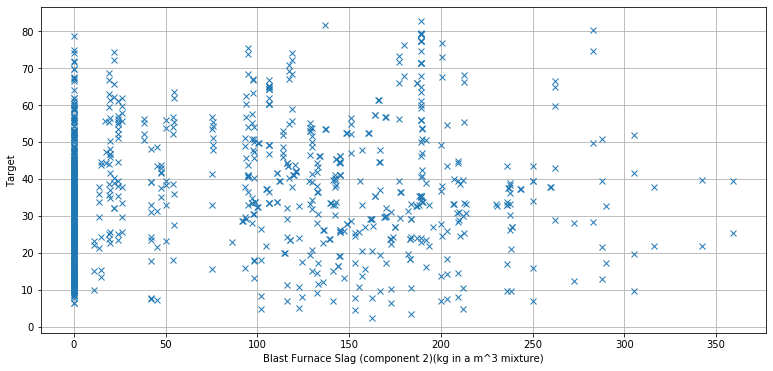

Fly Ash (component 3)(kg in a m^3 mixture)


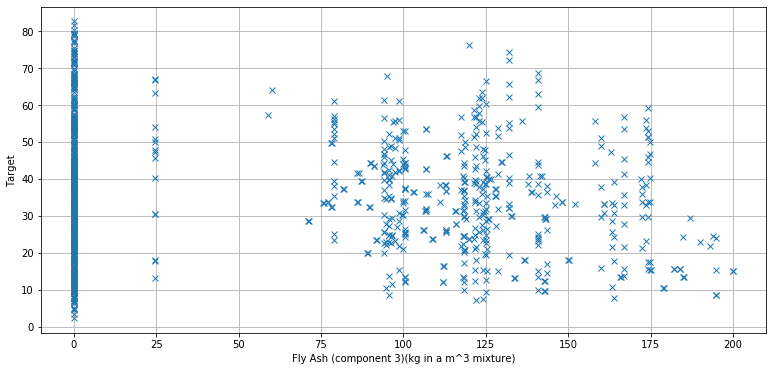

Water  (component 4)(kg in a m^3 mixture)


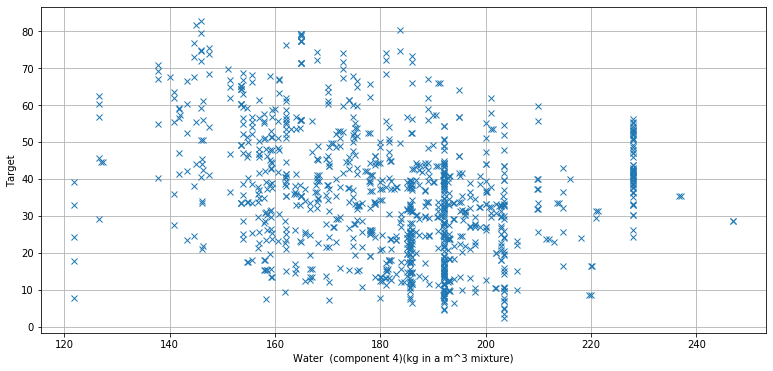

Superplasticizer (component 5)(kg in a m^3 mixture)


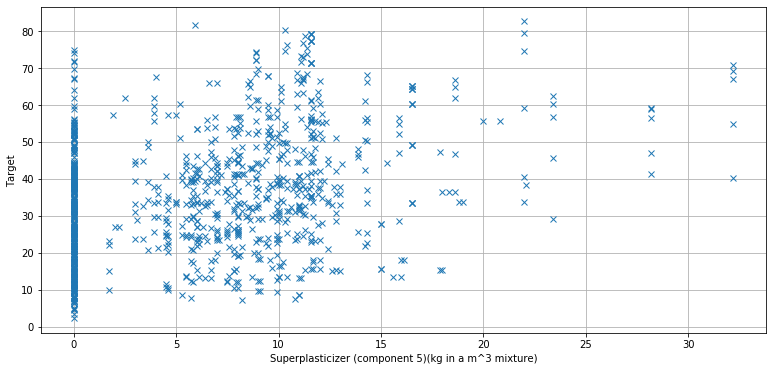

Coarse Aggregate  (component 6)(kg in a m^3 mixture)


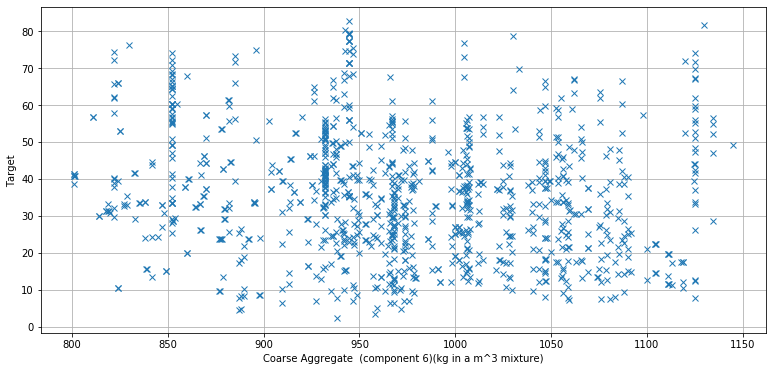

Fine Aggregate (component 7)(kg in a m^3 mixture)


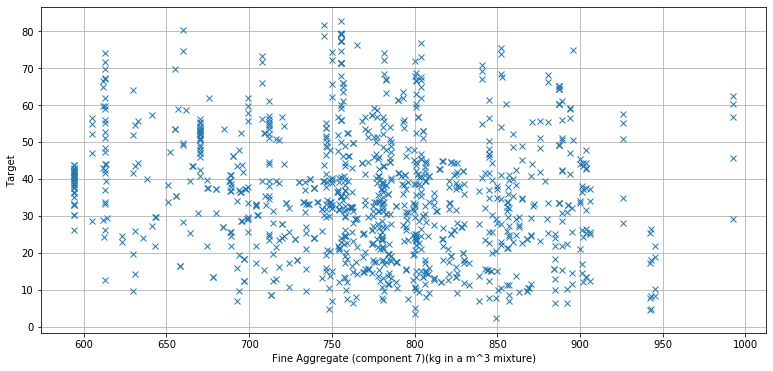

Age (day)


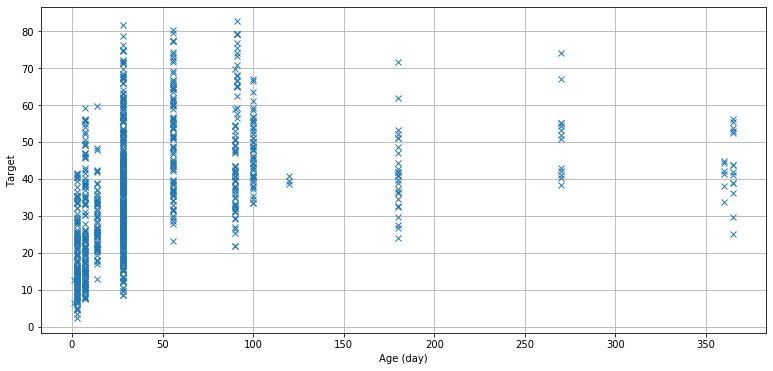

Now also plot the mean for each different feature
Feature 0 (Cement (component 1)(kg in a m^3 mixture))


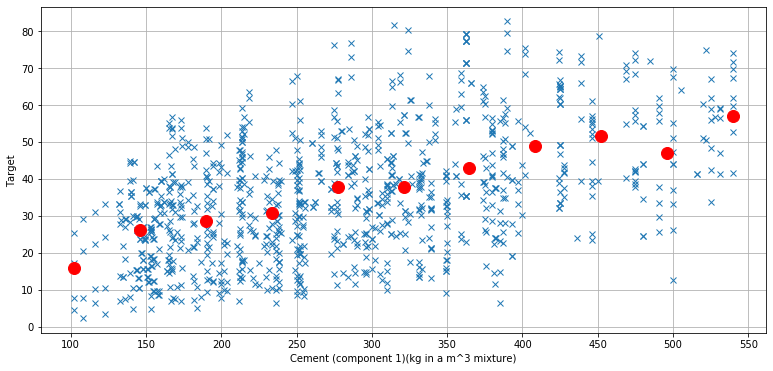

Feature 1 (Blast Furnace Slag (component 2)(kg in a m^3 mixture))


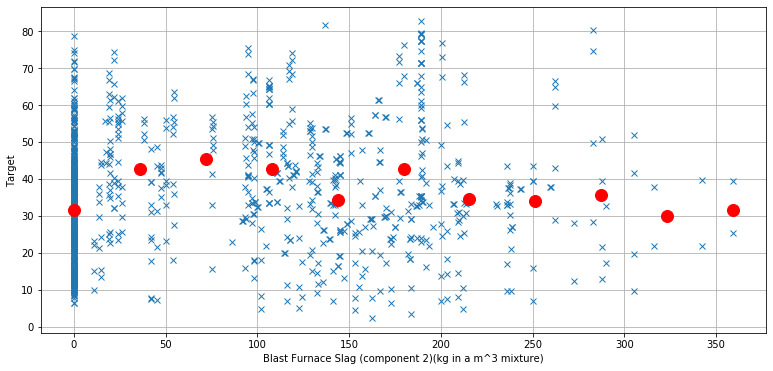

Feature 2 (Fly Ash (component 3)(kg in a m^3 mixture))


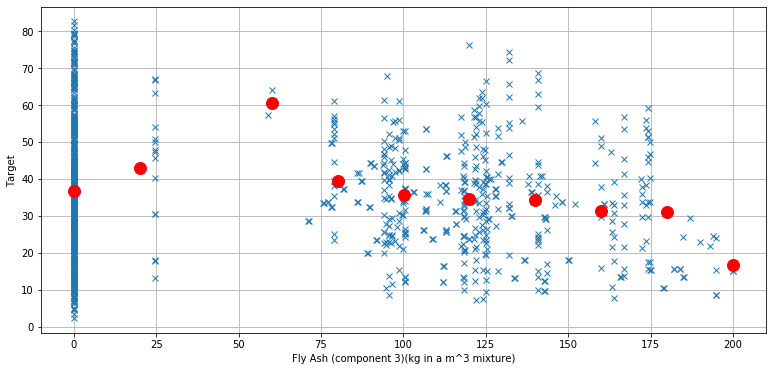

Feature 3 (Water  (component 4)(kg in a m^3 mixture))


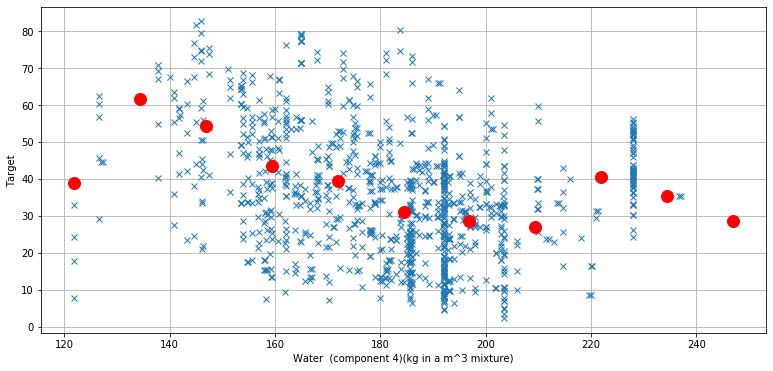

Feature 4 (Superplasticizer (component 5)(kg in a m^3 mixture))


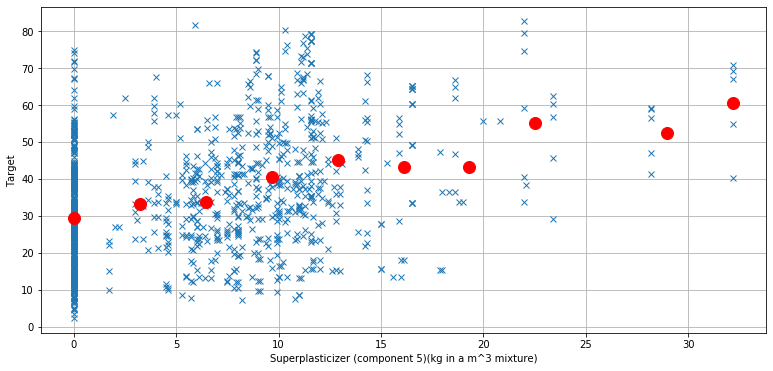

In [0]:
# Prepare
#import time
import warnings
import graphviz

import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

from sklearn import linear_model as lm
from sklearn import utils
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
rcParams['figure.figsize'] = (13, 6)

#for google colab

from google.colab import drive
drive.mount('/content/drive')

def show_metrics(y_test,ypred):
  '''
  print the mse , mae and mape metric

  '''
  mse = np.mean((y_test - ypred) ** 2)
  mae = np.mean(np.fabs(y_test - ypred))
  mape= np.mean(np.abs((y_test - ypred) / y_test)) * 100

  print("MSE: %f" % (mse))
  print("MAE: %f" % (mae))
  print("MAPE : %f"%(mape))
  print()


def test_poly_regression(X_train, y_train, X_test, y_test, n=2):

  # training
  poly_reg = PolynomialFeatures(degree = n)
  X_poly = poly_reg.fit_transform(X_train)
  lr = lm.LinearRegression()
  lr.fit(X_poly,y_train)

  # testing
  test_poly = poly_reg.fit_transform(X_test)
  ypred = lr.predict(test_poly)
  return ypred


data = pd.read_csv("/content/drive/My Drive/google_colab/set lab1/Concrete_Data.csv")
# set the colum headers
data.columns = ['Cement (component 1)(kg in a m^3 mixture)',
              'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
              'Fly Ash (component 3)(kg in a m^3 mixture)',
              'Water  (component 4)(kg in a m^3 mixture)',
              'Superplasticizer (component 5)(kg in a m^3 mixture)',
              'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
              'Fine Aggregate (component 7)(kg in a m^3 mixture)',
              'Age (day)',
              'Concrete compressive strength(MPa, megapascals)']

data.head(5)
# seperate the data from the targets
X = data.loc[:, data.columns != 'Concrete compressive strength(MPa, megapascals)']
y = data.loc[:, data.columns == 'Concrete compressive strength(MPa, megapascals)']


# Exploration section
print("Plot target with each feature separately")
for i in range(data.shape[1]-1):
    print(data.columns[i])
    plt.plot(data[data.columns[i]],data[data.columns[data.shape[1]-1]],'x')
    plt.xlabel(data.columns[i])
    plt.ylabel("Target")
    plt.grid()
    plt.show()


# Now also plot the mean for each different feature
print("Now also plot the mean for each different feature")
t = y
n_elem = 10.0
for i in range(data.shape[1]):
    print("Feature %d (%s)" % (i, data.columns[i]))
    d = data.iloc[:, i]
    step = (np.max(d) - np.min(d)) / n_elem
    r = np.arange(np.min(d) - step / 2, np.max(d) + 3 * step / 2, step)
    v = np.zeros(r.shape[0] - 1)
    for j in range(r.shape[0] - 1):
        idx = np.logical_and(d >= r[j], d < r[j + 1])
        if (t[idx]).size == 0:
            v[j] = np.nan
        else:
            v[j] = np.mean(t[idx])
    plt.plot(d, t, 'x')
    ax = plt.gca()
    ax.locator_params(axis='both', nbins=10)
    plt.plot(r[:-1] + step / 2, v, 'or', markersize=12)
    plt.xlabel(data.columns[i])
    plt.ylabel("Target")
    plt.grid()
    plt.show()


# Let's see the correlation between each variable and the target

df = pd.DataFrame(np.hstack((X, y)),
                  columns=data.columns)
C = df.corr()
print(C['Concrete compressive strength(MPa, megapascals)'])



'''
# let's see the correlation between variables

f = plt.figure(figsize=(19, 15))
plt.matshow(X.corr(), fignum=f.number)
plt.xticks(range(X.shape[1]), X.columns, fontsize=14, rotation=45)
plt.yticks(range(X.shape[1]), X.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix', fontsize=14);
'''


# now let's split the dataset to train  and test set 
train_id = int(X.shape[0] * 0.7)

# wet take the first 721 rows for training and the rest are for testing
X_train = X.loc[0:train_id, :]
X_test = X.loc[train_id:, :]
y_train = y.loc[0:train_id]
y_test = y.loc[train_id:]



#

#Ordinary Least Squares regression
lr = lm.LinearRegression().fit(X_train, y_train)
ypred = lr.predict(X_test)

print("Linear Regression")
show_metrics(y_test,ypred)


# Ridge regression
print("Ridge Regression for different alpha")
ridge_alpha=[0.1,1.0,10,100,200]
for alpha in ridge_alpha:
  print("for alpha %f"% (alpha))
  ridge = lm.Ridge(alpha=alpha)
  ridge.fit(X_train, y_train)

  ypred = ridge.predict(X_test)
  show_metrics(y_test,ypred)


# LASSO regression
print("LASSO Regression for different alpha")
lasso_alpha=[0.1,1.0,10,100,200]
for alpha in lasso_alpha:
  print("for alpha %f"% (alpha))
  lasso = lm.Lasso(alpha=alpha)
  lasso.fit(X_train, y_train)

  ypred = lasso.predict(X_test)
  ypred=ypred.reshape(309,1)

  show_metrics(y_test,ypred)


# Let's do the same with multiple iterations n = 10

# Linear Regression
n_iter = 10
mse = np.zeros(n_iter)
mae = np.zeros(n_iter)
mape = np.zeros(n_iter)
for i in range(n_iter):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)
  lr = lm.LinearRegression().fit(X_train, y_train)

  ypred = lr.predict(X_test)
  mse[i] = np.mean((y_test - ypred) ** 2)
  mae[i] = np.mean(np.fabs(y_test - ypred))
  mape[i]= np.mean(np.abs((y_test - ypred) / y_test)) * 100

mse_ols = np.mean(mse)
mse_ols_std = np.std(mse)
mae_ols = np.mean(mae)
mae_ols_std = np.std(mae)
mape_ols = np.mean(mape)
mape_ols_std = np.std(mape)

print("Linear Regression")
print("Average over " + str(n_iter) + " runs:")
print("MSE: %f (%f) " % (mse_ols, mse_ols_std))
print("MAE: %f (%f) " % (mae_ols, mae_ols_std))
print("MAPE: %f (%f) " % (mape_ols, mape_ols_std))
print()

# Ridge regression

mse = np.zeros(n_iter)
mae = np.zeros(n_iter)
mape = np.zeros(n_iter)
for i in range(n_iter):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)
  lr = lm.Ridge(alpha=100).fit(X_train, y_train)

  ypred = lr.predict(X_test)
  mse[i] = np.mean((y_test - ypred) ** 2)
  mae[i] = np.mean(np.fabs(y_test - ypred))
  mape[i]= np.mean(np.abs((y_test - ypred) / y_test)) * 100

mse_ols = np.mean(mse)
mse_ols_std = np.std(mse)
mae_ols = np.mean(mae)
mae_ols_std = np.std(mae)
mape_ols = np.mean(mape)
mape_ols_std = np.std(mape)
print("Ridge Regression")
print("Average over " + str(n_iter) + " runs:")
print("MSE: %f (%f) " % (mse_ols, mse_ols_std))
print("MAE: %f (%f) " % (mae_ols, mae_ols_std))
print("MAPE: %f (%f) " % (mape_ols, mape_ols_std))
print()


# LASSO regression

mse = np.zeros(n_iter)
mae = np.zeros(n_iter)
mape = np.zeros(n_iter)
for i in range(n_iter):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)
  lr = lm.Lasso(alpha=10).fit(X_train, y_train)

  ypred = lr.predict(X_test)
  ypred=ypred.reshape(ypred.size,1)
  mse[i] = np.mean((y_test - ypred) ** 2)
  mae[i] = np.mean(np.fabs(y_test - ypred))
  mape[i]= np.mean(np.abs((y_test - ypred) / y_test)) * 100

mse_ols = np.mean(mse)
mse_ols_std = np.std(mse)
mae_ols = np.mean(mae)
mae_ols_std = np.std(mae)
mape_ols = np.mean(mape)
mape_ols_std = np.std(mape)
print("LASSO Regression")
print("Average over " + str(n_iter) + " runs:")
print("MSE: %f (%f) " % (mse_ols, mse_ols_std))
print("MAE: %f (%f) " % (mae_ols, mae_ols_std))
print("MAPE: %f (%f) " % (mape_ols, mape_ols_std))
print()



#https://www.hackerrank.com/challenges/predicting-office-space-price/forum/comments/663753
# polynomial regression
#
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

degree_max=10
print("Polynomial Regression")
for degree in range(1,degree_max+1):
  print("For degree %i"%degree)
  ypred=test_poly_regression(X_train, y_train, X_test, y_test, n=degree)
  #accuracy_score(y_test,ypred)
  show_metrics(y_test,ypred)
